In [1]:
import re
import nltk
import random
import string
import os
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import TSNEVisualizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

need to download if you don't download it

In [2]:
nltk.download('stopwords')
%pip install WordCloud
%pip install yellowbrick

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asdcx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.



In [3]:
def process_book(book_path, num_sentences=200, sentence_len=100):
    random.seed(5)
    # Read the text book
    with open(book_path, 'r', encoding='utf-8') as f:
        book = f.read()


    # remove all the empty lines
    book = re.sub(r'\n\s*\n', '\n', book)


    # tokenize the book
    tokens = nltk.word_tokenize(book)


    # lower case all the words
    tokens = [w.lower() for w in tokens]


    # remove stopwords from tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]


    # remove punctuation from tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    tokens = [w for w in tokens if w.isalpha()]

    # perform lemmetization on the data
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    # get the author name
    author = re.search(r'Author: (.*)', book).group(1)


    # create random sentences from the tokens
    sentences = []
    for i in range(num_sentences):
    
        index = random.randint(0, len(tokens)-sentence_len)
        sentence = " ".join(tokens[index:index+sentence_len])
        sentences.append(sentence)


    # create a dataframe from the sentences associated with the author name as a label 
    df = pd.DataFrame({'sentence': sentences, 'author': author})


    return df

In [4]:
# define the folder path containing the books
folder_path ='F:/الكلية/DEBI/uottawa/NLP/assignment/assignment 3/Book-Classifaction/BOOKS'

# create an empty dataframe to store the processed books
df_books = pd.DataFrame(columns=['sentence', 'author'])

# loop through all the files in the folder
for filename in os.listdir(folder_path):
    # check if the file is a text file
    print(filename)
    if filename.endswith('.txt'):
        # get the full path of the file
        file_path = os.path.join(folder_path, filename)
        # process the book and append the resulting dataframe to the main dataframe
        df_book = process_book(file_path)
        df_books = pd.concat([df_books, df_book], ignore_index=True)

# print the first few rows of the resulting dataframe



A fighting man of Mars.txt
A Journey to the Centre of the Earth.txt
The Eyes Have It.txt
The Lost World.txt
The War of the Worlds.txt


In [5]:
df_books

,sentence,author
0,distribution project work wish charge fee dist...,Edgar Rice Burroughs
1,raised leafy branch far water brilliant scarle...,Edgar Rice Burroughs
2,ground time destroyed navy jahar disintegratin...,Edgar Rice Burroughs
3,tul axtar encouraged first success moving swif...,Edgar Rice Burroughs
4,conversationalist well schooled stately dance ...,Edgar Rice Burroughs
...,...,...
995,well possible tortured men shadow gone last el...,H. G. Wells
996,vapour diffuse true gas would hung together ba...,H. G. Wells
997,radius five mile round woking sandpit doubt wo...,H. G. Wells
998,quite unable anything shouted consolation prom...,H. G. Wells


In [6]:
# Reset the index of the shuffled DataFrame to start from 0 and drop the old index.
df_books = df_books.sample(frac=1).reset_index(drop=True)

In [7]:
Author = list(df_books.author.unique())
Author_dic={}
for index ,name  in enumerate(Author):
    Author_dic[index] =name
Author_dic

{0: 'Arthur Conan Doyle',
 1: 'Jules Verne',
 2: 'H. G. Wells',
 3: 'Edgar Rice Burroughs',
 4: 'Philip Kindred Dick'}

In [8]:
# create a dictionary to map the distinct values to labels
label_author = {'Edgar Rice Burroughs': 'a', 'Jules Verne': 'b', 'Philip Kindred Dick': 'c', 'Arthur Conan Doyle': 'd', 'H. G. Wells': 'e'}

# use the replace() method to map the distinct values to labels
df_books['label'] = df_books['author'].replace(label_author)

# display the resulting DataFrame
df_books

,sentence,author,label
0,sank whisper alone ignorant name giant growth ...,Arthur Conan Doyle,d
1,far aware since departure matter entered upon ...,Jules Verne,b
2,engaged making heavy beating sound evidently b...,H. G. Wells,e
3,delay longer one thing however may sure whethe...,Edgar Rice Burroughs,a
4,clothes railway porter one wretched creature n...,H. G. Wells,e
...,...,...,...
995,paid fee obtaining copy access project gutenbe...,Philip Kindred Dick,c
996,epsom reach leatherhead started companion acti...,H. G. Wells,e
997,terrible presence haunted invaded remote sacre...,Arthur Conan Doyle,d
998,promontory found close lofty forest consisted ...,Jules Verne,b


In [16]:
#################################################
##function to display all frequency
###########################################


def show_most_word_in_book(df_books,number_of_book=0,number_of_max_word=200,list_names=Author_dic):
    all_words = WordCloud(collocations=False,
                background_color="black",
                max_words=number_of_max_word,
                contour_color='steelblue',
                contour_width=16)

    # Generate a wordcloud
    print("Name of Author ",Author_dic.get(number_of_book))
    #print(df_books[df_books["author"]==number_of_book]["sentence"])
    all_words.generate(str(df_books[df_books['author']==number_of_book]['sentence']))

    # show
    #plt.figure(figsize=[20,10])
    plt.axis('off')
    plt.imshow(all_words)
    plt.legend(Author_dic.get(number_of_book))
    plt.imshow(all_words, cmap=None)

    plt.show()

In [10]:
df_books['author'] = pd.factorize(df_books['author'])[0]

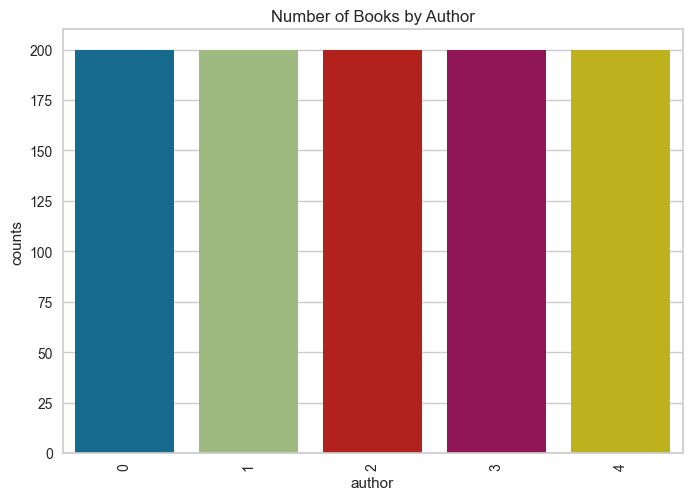

In [11]:
# create a new DataFrame with the count of books by author
author_counts = df_books.groupby('author').size().reset_index(name='counts')

# plot the results using seaborn
ax = sns.barplot(x="author", y="counts", data=author_counts)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# add title
plt.title('Number of Books by Author')

# show the plot
plt.show()



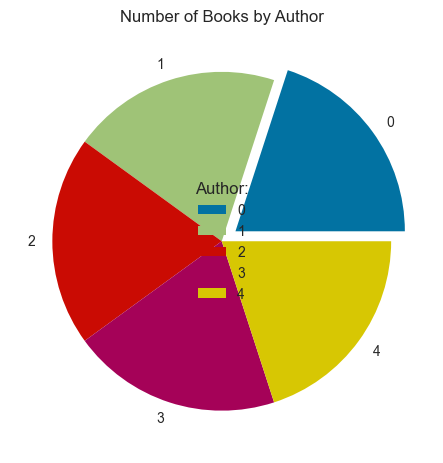

In [12]:
# create a pie chart of book counts by author
df_books['author'].value_counts().plot.pie(explode = [0.1, 0, 0, 0,0])

# add a legend to the chart
plt.legend(title = 'Author:',loc='center')
# hide the y-axis label
plt.ylabel('')
# add title
plt.title('Number of Books by Author')
# show the chart
plt.show()

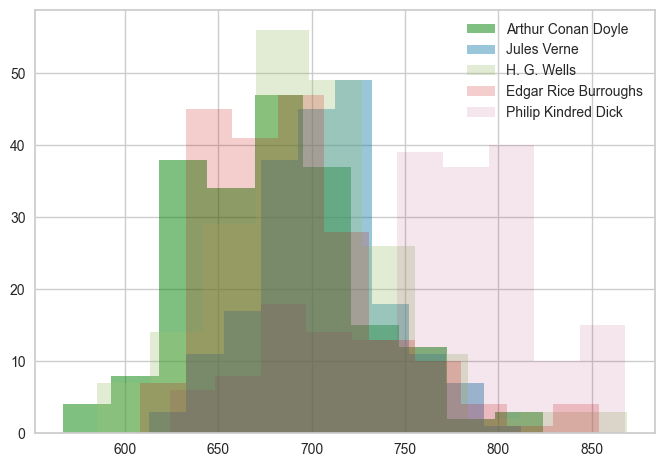

In [13]:
df_books['char_length']=df_books['sentence'].apply(len)
df_books[df_books['author']==0]['char_length'].hist(label=df_books['author'],alpha=0.5,color=['green'] )
df_books[df_books['author']==1]['char_length'].hist(label=df_books['author'],alpha=0.4)
df_books[df_books['author']==2]['char_length'].hist(label=df_books['author'],alpha=0.3)
df_books[df_books['author']==3]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==4]['char_length'].hist(label=df_books['author'],alpha=0.1)
plt.legend([Author_dic.get(0),Author_dic.get(1),Author_dic.get(2),Author_dic.get(3),Author_dic.get(4)])


Name of Author  Arthur Conan Doyle


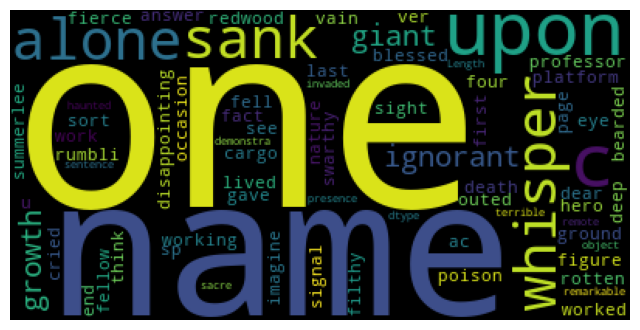

Name of Author  Jules Verne


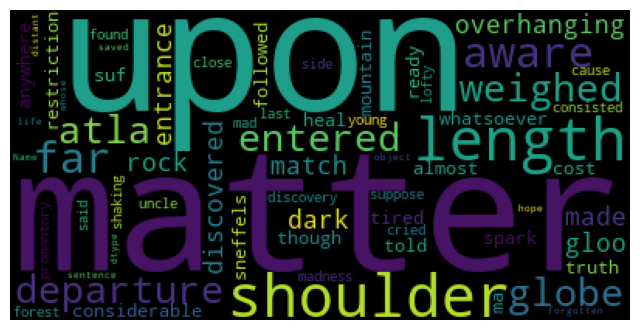

Name of Author  H. G. Wells


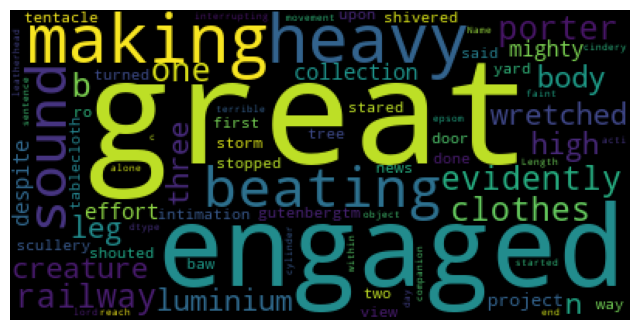

Name of Author  Edgar Rice Burroughs


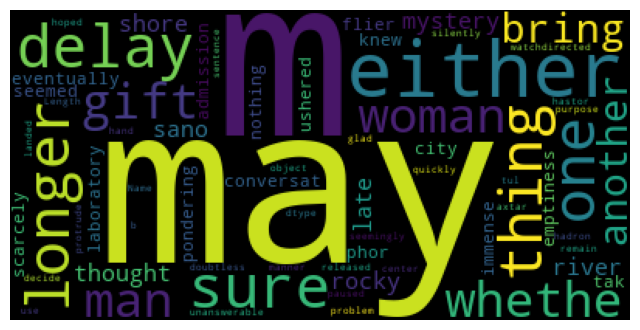

Name of Author  Philip Kindred Dick


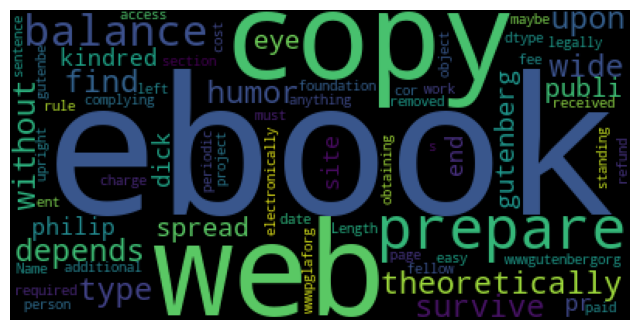

In [17]:
for i in range (5):
 show_most_word_in_book(df_books,number_of_book=i,number_of_max_word=200)


<AxesSubplot:title={'center':'Top 40 words'}, xlabel='word'>

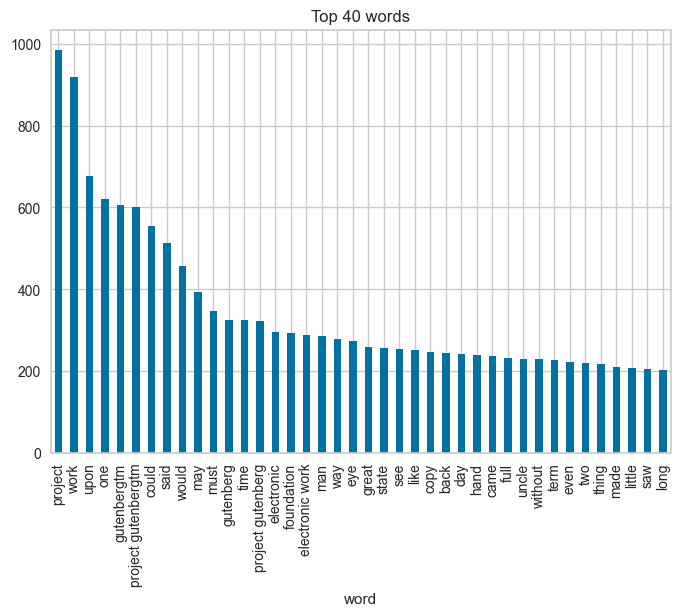

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_books['sentence'], 40)
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 40 words')

In [19]:
# split the data to intput  and Target
X = df_books['sentence']
Y = df_books['author']

# Set of BOW

In [21]:
# transform the data to a BOW

vect = CountVectorizer()
X_BOW = vect.fit_transform(X)
count_array = X_BOW.toarray()
df_books_BOW = pd.DataFrame(count_array,columns = vect.get_feature_names())
df_books_BOW

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abart,abbey,abduct,abducted,abducting,abduction,abductor,...,zenithward,zero,zigzag,zitidar,zode,zodiac,zoological,zoologist,zoology,zoophyte
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

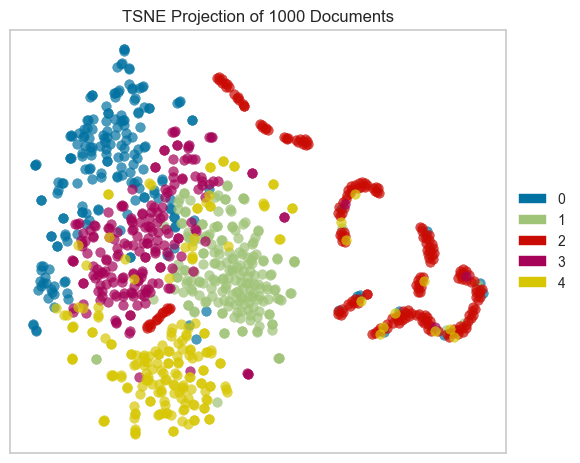

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [105]:

tsne = TSNEVisualizer()
tsne.fit(df_books_BOW,df_books['author'])
tsne.show()


# set of TF IDF

In [22]:
# transform the data to a tf-idf representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_books["sentence"])
#print(tfidf_vectorizer_vectors.toarray())
#print(tfidf_vectorizer.get_feature_names())
df_books_tf_idf = pd.DataFrame(tfidf_vectorizer_vectors.toarray(),columns=tfidf_vectorizer.get_feature_names())
df_books_tf_idf

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abart,abbey,abduct,abducted,abducting,abduction,abductor,...,zenithward,zero,zigzag,zitidar,zode,zodiac,zoological,zoologist,zoology,zoophyte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.112451,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

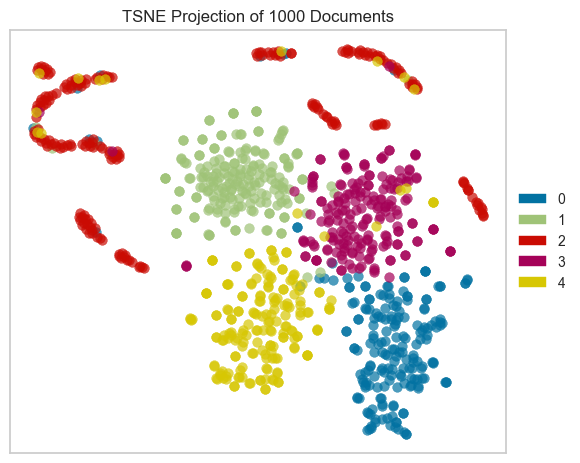

In [108]:

tsne = TSNEVisualizer()
tsne.fit(df_books_tf_idf,df_books['author'])

tsne.show(legend=["Author 1","Author 2","Author 3","Author 4","Author 5"])
plt.show()

# set of Ngram

In [23]:
#N_gram
count_vect = CountVectorizer(ngram_range=(1,3))
ngram_vectors=count_vect.fit_transform(df_books["sentence"])
df_books_ngram = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names())
df_books_ngram

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandon bottom,abandon bottom abyss,abandoned,abandoned alone,abandoned alone dreadful,abandoned argument,abandoned argument paper,abandoned boat,abandoned boat small,...,zoologist since,zoologist since world,zoologist university,zoologist university upsala,zoology,zoology little,zoology little known,zoophyte,zoophyte period,zoophyte period transition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

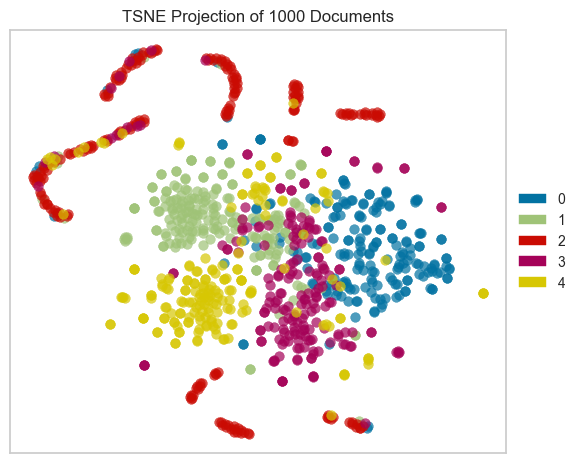

In [110]:

tsne = TSNEVisualizer()
tsne.fit(df2,df_books['author'])

tsne.show(legend=["Author 1","Author 2","Author 3","Author 4","Author 5"])
plt.show()

In [ ]:
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

# 

# Apply Algthims 

In [14]:
# create a function to train and test the model with different performance metrics

def train_test_model(model, X_train, X_test, y_train, y_test):
    #print model name
    print(model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    print("-"*50)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print("-"*50)
    print('Confusion Matrix: \n ', metrics.confusion_matrix(y_test, y_pred_class))
    print("-"*50)
    print('Classification Report:\n ', metrics.classification_report(y_test, y_pred_class))
    return model



In [25]:
def train_test_model(model,input_data,traget,number_of_kfold=10):
    X_train, X_test, y_train, y_test = train_test_split(input_data, traget, test_size=0.2, random_state=1)
    kf = KFold(n_splits=number_of_kfold, shuffle=True, random_state=42)
    fold_accuracies = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(input_data)):
        print(f"Fold {fold+1}")
        X_train, y_train = input_data[train_idx], traget[train_idx]
        X_val, y_val = input_data[val_idx], traget[val_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        print(f"Accuracy: {accuracy}")
        print("Claassification report:\n",classification_report(y_val, y_pred))
        fold_accuracies.append(accuracy)
        #test_set
    return  fold_accuracies


# RandomForestClassifier

BOW

In [26]:

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
train_test_model(rfc,X_BOW,Y,number_of_kfold=10)


Fold 1
Accuracy: 0.98
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.95      0.95      0.95        22
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Fold 2
Accuracy: 0.93
Claassification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       1.00      0.95      0.98        22
           2       0.91      0.95      0.93        21
           3       1.00      0.94      0.97        18
           4       0.86      0.90      0.88        20

    accuracy                           0.93       100
   macro avg       0.93      0.93    

[0.98, 0.93, 0.96, 0.97, 0.96, 0.98, 0.95, 0.91, 0.95, 0.97]

tf-idf

In [115]:
train_test_model(rfc,tfidf_vectorizer_vectors,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.98
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      0.95      0.98        21
           4       0.95      1.00      0.97        18

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Fold 2
Accuracy: 0.93
Claassification report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       1.00      0.88      0.94        25
           2       0.82      1.00      0.90        18
           3       1.00      1.00      1.00        17
           4       0.93      0.96      0.94        26

    accuracy                           0.93       100
   macro avg       0.93      0.93    

[0.98, 0.93, 0.95, 0.92, 0.93, 0.94, 0.96, 0.94, 0.95, 0.96]

Ngram

In [116]:
train_test_model(rfc,ngram_vectors,Y,number_of_kfold=10)

Fold 1
Accuracy: 1.0
Claassification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.92      0.96        25
           2       0.82      1.00      0.90        18
           3       1.00      1.00      1.00        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.93     

[1.0, 0.94, 0.97, 0.95, 0.9, 0.94, 0.97, 0.96, 0.96, 0.97]

#######################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

# Naive Bayes

BOW

In [118]:
# train and test the model with Naive Bayes

nb = MultinomialNB()
Reslut_from_Naive_Bayes_BOW=train_test_model(nb,X_BOW,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.92      0.96        25
           2       0.82      1.00      0.90        18
           3       1.00      1.00      1.00        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.93    

tf-idf

In [119]:
Reslut_from_Naive_Bayes_tfidf=train_test_model(nb,tfidf_vectorizer_vectors,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.93
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.92      0.96        25
           2       0.82      1.00      0.90        18
           3       0.94      1.00      0.97        17
           4       0.92      0.92      0.92        26

    accuracy                           0.93       100
   macro avg       0.94      0.93    

Ngram

In [120]:
Reslut_from_Naive_Bayes_ngram=train_test_model(nb,ngram_vectors,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.95
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.96      0.98        25
           2       0.82      1.00      0.90        18
           3       1.00      1.00      1.00        17
           4       0.96      0.96      0.96        26

    accuracy                           0.95       100
   macro avg       0.96      0.94    

#######################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [122]:
%pip install xgboost


     -------------------------------------- 125.4/125.4 MB 2.5 MB/s eta 0:00:00


In [124]:
# train and test the model with XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
Reslut_from_xgb_BOW=train_test_model(xgb,X_BOW,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.98
Claassification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      0.90      0.95        21
           4       1.00      1.00      1.00        18

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Fold 2
Accuracy: 0.92
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      0.92      0.90        25
           2       0.89      0.94      0.92        18
           3       1.00      0.88      0.94        17
           4       0.89      0.96      0.93        26

    accuracy                           0.92       100
   macro avg       0.93      0.91    

tf-idf

In [125]:
Reslut_from_xgb_tf_idf=train_test_model(xgb,tfidf_vectorizer_vectors,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.98
Claassification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      0.90      0.95        21
           4       1.00      1.00      1.00        18

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Fold 2
Accuracy: 0.9
Claassification report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.96      0.88      0.92        25
           2       0.81      0.94      0.87        18
           3       0.94      0.94      0.94        17
           4       0.89      0.96      0.93        26

    accuracy                           0.90       100
   macro avg       0.90      0.89     

Ngram

In [126]:
Reslut_from_xgb_ngram=train_test_model(xgb,ngram_vectors,Y,number_of_kfold=10)

Fold 1
Accuracy: 0.97
Claassification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      0.90      0.95        21
           4       0.95      1.00      0.97        18

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      0.92      0.92        25
           2       0.89      0.94      0.92        18
           3       1.00      0.94      0.97        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.94    

# KNN

BOW

In [149]:


KNN = KNeighborsClassifier(n_neighbors = 3, algorithm= 'kd_tree', p= 1)

Reslut_KNN_BOW = train_test_model(KNN,X_BOW,Y,number_of_kfold= 10)

Fold 1
Accuracy: 0.98
Claassification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      0.95      0.98        21
           4       0.94      0.94      0.94        18

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Fold 2


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.92
Claassification report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.96      0.88      0.92        25
           2       0.86      1.00      0.92        18
           3       1.00      0.94      0.97        17
           4       1.00      0.88      0.94        26

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100

Fold 3


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.92
Claassification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.91      0.95        23
           2       0.86      0.95      0.90        20
           3       0.88      1.00      0.94        15
           4       1.00      0.75      0.86        20

    accuracy                           0.92       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100

Fold 4
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       1.00      1.00      1.00        17
           2       0.87      0.96      0.92        28
           3       1.00      0.88      0.94        17
           4       0.92      1.00      0.96        12

    accuracy                           0.94       100
   macro avg       0.95      0.95      0.95 

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.89
Claassification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.94      0.88      0.91        17
           2       0.89      0.86      0.87        28
           3       0.94      0.94      0.94        17
           4       0.88      0.88      0.88        16

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

Fold 6
Accuracy: 0.91
Claassification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.96      0.96      0.96        23
           2       0.79      1.00      0.88        15
           3       1.00      0.90      0.95        20
           4       0.93      0.74      0.82        19

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91 

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.89
Claassification report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.86      0.95      0.90        20
           2       0.80      0.92      0.86        13
           3       0.93      0.93      0.93        29
           4       1.00      0.79      0.88        28

    accuracy                           0.89       100
   macro avg       0.87      0.90      0.88       100
weighted avg       0.90      0.89      0.89       100

Fold 9
Accuracy: 0.87
Claassification report:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.93      0.88      0.90        16
           2       0.83      0.95      0.89        21
           3       0.93      0.96      0.94        26
           4       1.00      0.53      0.69        17

    accuracy                           0.87       100
   macro avg       0.89      0.85      0.85 

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Claassification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00        22
           2       0.88      1.00      0.94        23
           3       1.00      0.94      0.97        17
           4       1.00      0.88      0.94        17

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



tf-idf 

In [150]:
Reslut_KNN_Tf_idf= train_test_model(KNN,tfidf_vectorizer_vectors,Y,number_of_kfold= 10)

Fold 1
Accuracy: 0.67
Claassification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.48      0.70      0.57        23
           2       0.59      1.00      0.75        19
           3       1.00      0.24      0.38        21
           4       1.00      0.50      0.67        18

    accuracy                           0.67       100
   macro avg       0.79      0.68      0.65       100
weighted avg       0.78      0.67      0.64       100

Fold 2


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.64
Claassification report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.55      0.84      0.67        25
           2       0.56      1.00      0.72        18
           3       1.00      0.24      0.38        17
           4       1.00      0.38      0.56        26

    accuracy                           0.64       100
   macro avg       0.76      0.65      0.61       100
weighted avg       0.77      0.64      0.61       100

Fold 3
Accuracy: 0.64
Claassification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.56      0.65      0.60        23
           2       0.47      0.95      0.63        20
           3       1.00      0.13      0.24        15
           4       1.00      0.45      0.62        20

    accuracy                           0.64       100
   macro avg       0.78      0.61      0.59 

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.66
Claassification report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       1.00      0.35      0.52        17
           2       0.48      0.96      0.64        28
           3       1.00      0.41      0.58        17
           4       0.90      0.75      0.82        12

    accuracy                           0.66       100
   macro avg       0.84      0.63      0.66       100
weighted avg       0.79      0.66      0.65       100

Fold 5
Accuracy: 0.59
Claassification report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.41      0.65      0.50        17
           2       0.57      0.86      0.69        28
           3       1.00      0.18      0.30        17
           4       0.71      0.31      0.43        16

    accuracy                           0.59       100
   macro avg       0.69      0.54      0.53 

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Claassification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.47      0.78      0.59        23
           2       0.50      1.00      0.67        15
           3       1.00      0.10      0.18        20
           4       0.86      0.32      0.46        19

    accuracy                           0.62       100
   macro avg       0.75      0.62      0.56       100
weighted avg       0.76      0.62      0.57       100

Fold 7
Accuracy: 0.58
Claassification report:
               precision    recall  f1-score   support

           0       0.64      0.91      0.75        23
           1       0.41      0.79      0.54        14
           2       0.50      0.93      0.65        15
           3       1.00      0.24      0.38        21
           4       1.00      0.26      0.41        27

    accuracy                           0.58       100
   macro avg       0.71      0.63      0.55       100
weigh

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.54
Claassification report:
               precision    recall  f1-score   support

           0       0.36      0.80      0.50        10
           1       0.54      0.75      0.63        20
           2       0.41      1.00      0.58        13
           3       1.00      0.24      0.39        29
           4       1.00      0.39      0.56        28

    accuracy                           0.54       100
   macro avg       0.66      0.64      0.53       100
weighted avg       0.77      0.54      0.52       100

Fold 9
Accuracy: 0.59
Claassification report:
               precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.44      0.75      0.56        16
           2       0.57      0.95      0.71        21
           3       1.00      0.19      0.32        26
           4       1.00      0.18      0.30        17

    accuracy                           0.59       100
   macro avg       0.73      0.60      0.53 

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.71
Claassification report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.71      0.77      0.74        22
           2       0.59      1.00      0.74        23
           3       1.00      0.29      0.45        17
           4       1.00      0.35      0.52        17

    accuracy                           0.71       100
   macro avg       0.81      0.67      0.66       100
weighted avg       0.79      0.71      0.68       100



Ngram

In [151]:
Reslut_KNN_Ngram = train_test_model(KNN,ngram_vectors,Y,number_of_kfold= 10)

Fold 1
Accuracy: 0.96


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Claassification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.91      0.93        23
           2       1.00      1.00      1.00        19
           3       0.91      0.95      0.93        21
           4       1.00      1.00      1.00        18

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Fold 2


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.88
Claassification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        25
           2       0.75      1.00      0.86        18
           3       0.94      0.94      0.94        17
           4       1.00      0.77      0.87        26

    accuracy                           0.88       100
   macro avg       0.89      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100

Fold 3


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.89
Claassification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.88      0.91      0.89        23
           2       0.83      0.95      0.88        20
           3       0.83      1.00      0.91        15
           4       1.00      0.65      0.79        20

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100

Fold 4


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.92
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       1.00      1.00      1.00        17
           2       0.90      0.96      0.93        28
           3       0.83      0.88      0.86        17
           4       0.86      1.00      0.92        12

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100

Fold 5


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.89
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.80      0.94      0.86        17
           2       0.86      0.86      0.86        28
           3       0.94      0.94      0.94        17
           4       0.87      0.81      0.84        16

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

Fold 6


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.84
Claassification report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       0.83      0.87      0.85        23
           2       0.71      1.00      0.83        15
           3       0.94      0.85      0.89        20
           4       1.00      0.47      0.64        19

    accuracy                           0.84       100
   macro avg       0.86      0.84      0.82       100
weighted avg       0.87      0.84      0.83       100

Fold 7


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.88
Claassification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.93      0.93      0.93        14
           2       1.00      0.93      0.97        15
           3       0.71      0.95      0.82        21
           4       0.95      0.70      0.81        27

    accuracy                           0.88       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.88      0.88       100

Fold 8


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.82
Claassification report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.86      0.95      0.90        20
           2       0.67      0.92      0.77        13
           3       0.82      0.97      0.89        29
           4       1.00      0.50      0.67        28

    accuracy                           0.82       100
   macro avg       0.82      0.85      0.81       100
weighted avg       0.85      0.82      0.81       100

Fold 9


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.89
Claassification report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       1.00      0.88      0.93        16
           2       0.81      1.00      0.89        21
           3       0.86      0.96      0.91        26
           4       1.00      0.59      0.74        17

    accuracy                           0.89       100
   macro avg       0.91      0.87      0.88       100
weighted avg       0.90      0.89      0.88       100

Fold 10


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.91
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      0.86      0.93        22
           2       0.82      1.00      0.90        23
           3       0.80      0.94      0.86        17
           4       1.00      0.82      0.90        17

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



SVM

In [152]:

svm = SVC(kernel='rbf')
Result_from_svm_BOW= train_test_model(svm, X_BOW,Y,number_of_kfold = 10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.93
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.88      0.94        25
           2       0.82      1.00      0.90        18
           3       0.94      1.00      0.97        17
           4       0.93      0.96      0.94        26

    accuracy                           0.93       100
   macro avg       0.94      0.93    

tf-idf

In [153]:
Result_from_svm_tf_idf= train_test_model(svm,tfidf_vectorizer_vectors,Y,number_of_kfold = 10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.92      0.96        25
           2       0.82      1.00      0.90        18
           3       1.00      1.00      1.00        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.93    

Ngram

In [154]:
Result_from_svm_ngram= train_test_model(svm,ngram_vectors,Y,number_of_kfold = 10)

Fold 1
Accuracy: 1.0
Claassification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      0.88      0.94        25
           2       0.86      1.00      0.92        18
           3       0.94      1.00      0.97        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.94     

# SGDClassifier

BOW

In [156]:



# Initialize the SGD classifier
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, learning_rate='constant', eta0=0.01, max_iter=1000, random_state=42)

# Train the classifier using SGD
Result_from_sgd_BOW= train_test_model(sgd,X_BOW,Y,number_of_kfold = 10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      0.95      0.98        21
           4       0.95      1.00      0.97        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.95
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.96      0.92      0.94        25
           2       0.90      1.00      0.95        18
           3       1.00      1.00      1.00        17
           4       0.93      0.96      0.94        26

    accuracy                           0.95       100
   macro avg       0.96      0.95    

tf-idf

In [157]:
Result_from_sgd_tf_idf= train_test_model(sgd,tfidf_vectorizer_vectors,Y,number_of_kfold = 10)

Fold 1
Accuracy: 0.99
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       1.00      0.92      0.96        25
           2       0.82      1.00      0.90        18
           3       1.00      1.00      1.00        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.93    

Ngram

In [158]:
Result_from_sgd_ngram= train_test_model(sgd,ngram_vectors,Y,number_of_kfold = 10)

Fold 1
Accuracy: 1.0
Claassification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Fold 2
Accuracy: 0.94
Claassification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.96      0.88      0.92        25
           2       0.90      1.00      0.95        18
           3       0.94      1.00      0.97        17
           4       0.93      0.96      0.94        26

    accuracy                           0.94       100
   macro avg       0.95      0.94     

In [159]:
Result_from_sgd_ngram

[1.0, 0.94, 0.97, 0.97, 0.91, 0.95, 0.98, 0.95, 0.94, 0.99]